# Visualización del IMDB Movies Dataset
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

## Carga y limpieza de los datos

En primer lugar, cargo el dataset descargado de Kaggle, reviso si hay valores nulos o errorneos para lluego manejarlos. Luego, analizando el contexto de cada una de las columnas convierto el tipo de algunas de ellas.

In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [4]:
## Eliminar valores nulos

print("Número de registros antes de eliminar valores nulos: ", len(df))
df = df.dropna(subset=['Certificate', 'Gross', 'Meta_score'], axis=0) #Borro los registros que contengan valores nulos en las columnas especificadas
print("Número de registros despues de eliminar valores nulos: ", len(df))
#df = df.dropna(axis=1) #Borro las columnas que contengan valores nulos, en este caso seria equivalente a la sigueinte linea de código
#df = df.drop('Meta_score', axis=1)

Número de registros antes de eliminar valores nulos:  1000
Número de registros despues de eliminar valores nulos:  714


In [5]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [6]:
df = df.drop(df[(df['Certificate'] == 'U/A') | (df['Certificate'] == 'TV-PG') | (df['Certificate'] == 'GP')].index) #Borro los registros marcados con calores exoticos en el atributo Certificate

In [7]:
#df['Released_Year'] = df['Released_Year'].astype(int)# No es posible convertir esta columna debido a un valor erroneo (descomentar la línea para ver el error)

In [8]:
#df['Released_Year'].to_csv('valores_released_year.txt', header=None, index=None, sep=' ')
df[df['Released_Year'] == 'PG'] #Vemos que una columna tiene un valor erroneo, lo que causo el error anterior, lo corregire manualmente

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [9]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995 #Corregimos el valor erroneo
df[df['Series_Title'] == 'Apollo 13']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [10]:
#Conversion de tipo en las columnas que realmente representan valores numericos
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [11]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## Visualización del Dataset

Con el dataset limpio para el propósito que se tiene, realizo algunas visualizaciones del dataset para practicar lo visto en clase. Unicamente se pretende realizar los graficos, no sacar conclusiones ni mucho menos hacer un EDA.

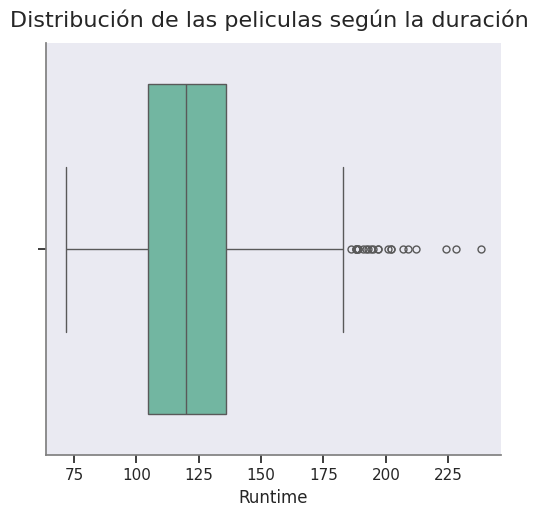

In [12]:
sns.set(style="ticks")  # Estilo de los ejes
plt.rcParams["axes.facecolor"] = "#EAEAF2" 
plt.rcParams["axes.edgecolor"] = "gray"
custom_palette = sns.color_palette("Set2")  # Paleta de colores
sns.set_palette(custom_palette)
sns.catplot(data=df, x='Runtime',kind="box")
plt.suptitle("Distribución de las peliculas según la duración", y=1.03, fontsize=16)
plt.show()

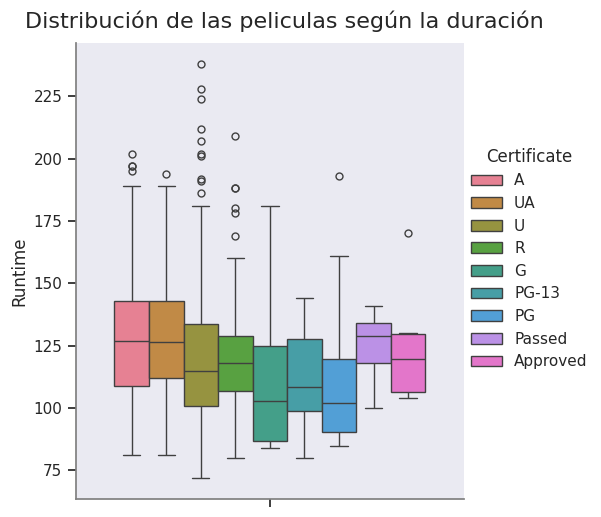

In [13]:
sns.catplot(data=df, y='Runtime',kind="box",hue='Certificate')
plt.suptitle("Distribución de las peliculas según la duración", y=1.03, fontsize=16)
plt.show()

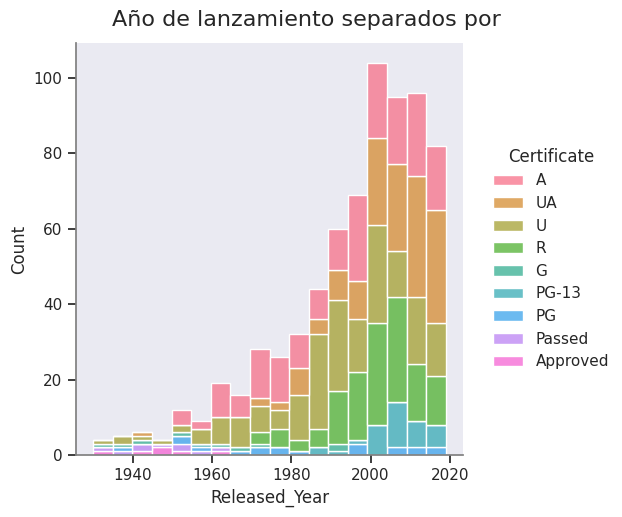

In [14]:
sns.displot(data= df, x='Released_Year',hue='Certificate', multiple='stack')
plt.suptitle("Año de lanzamiento separados por", y=1.03, fontsize=16)
plt.show()

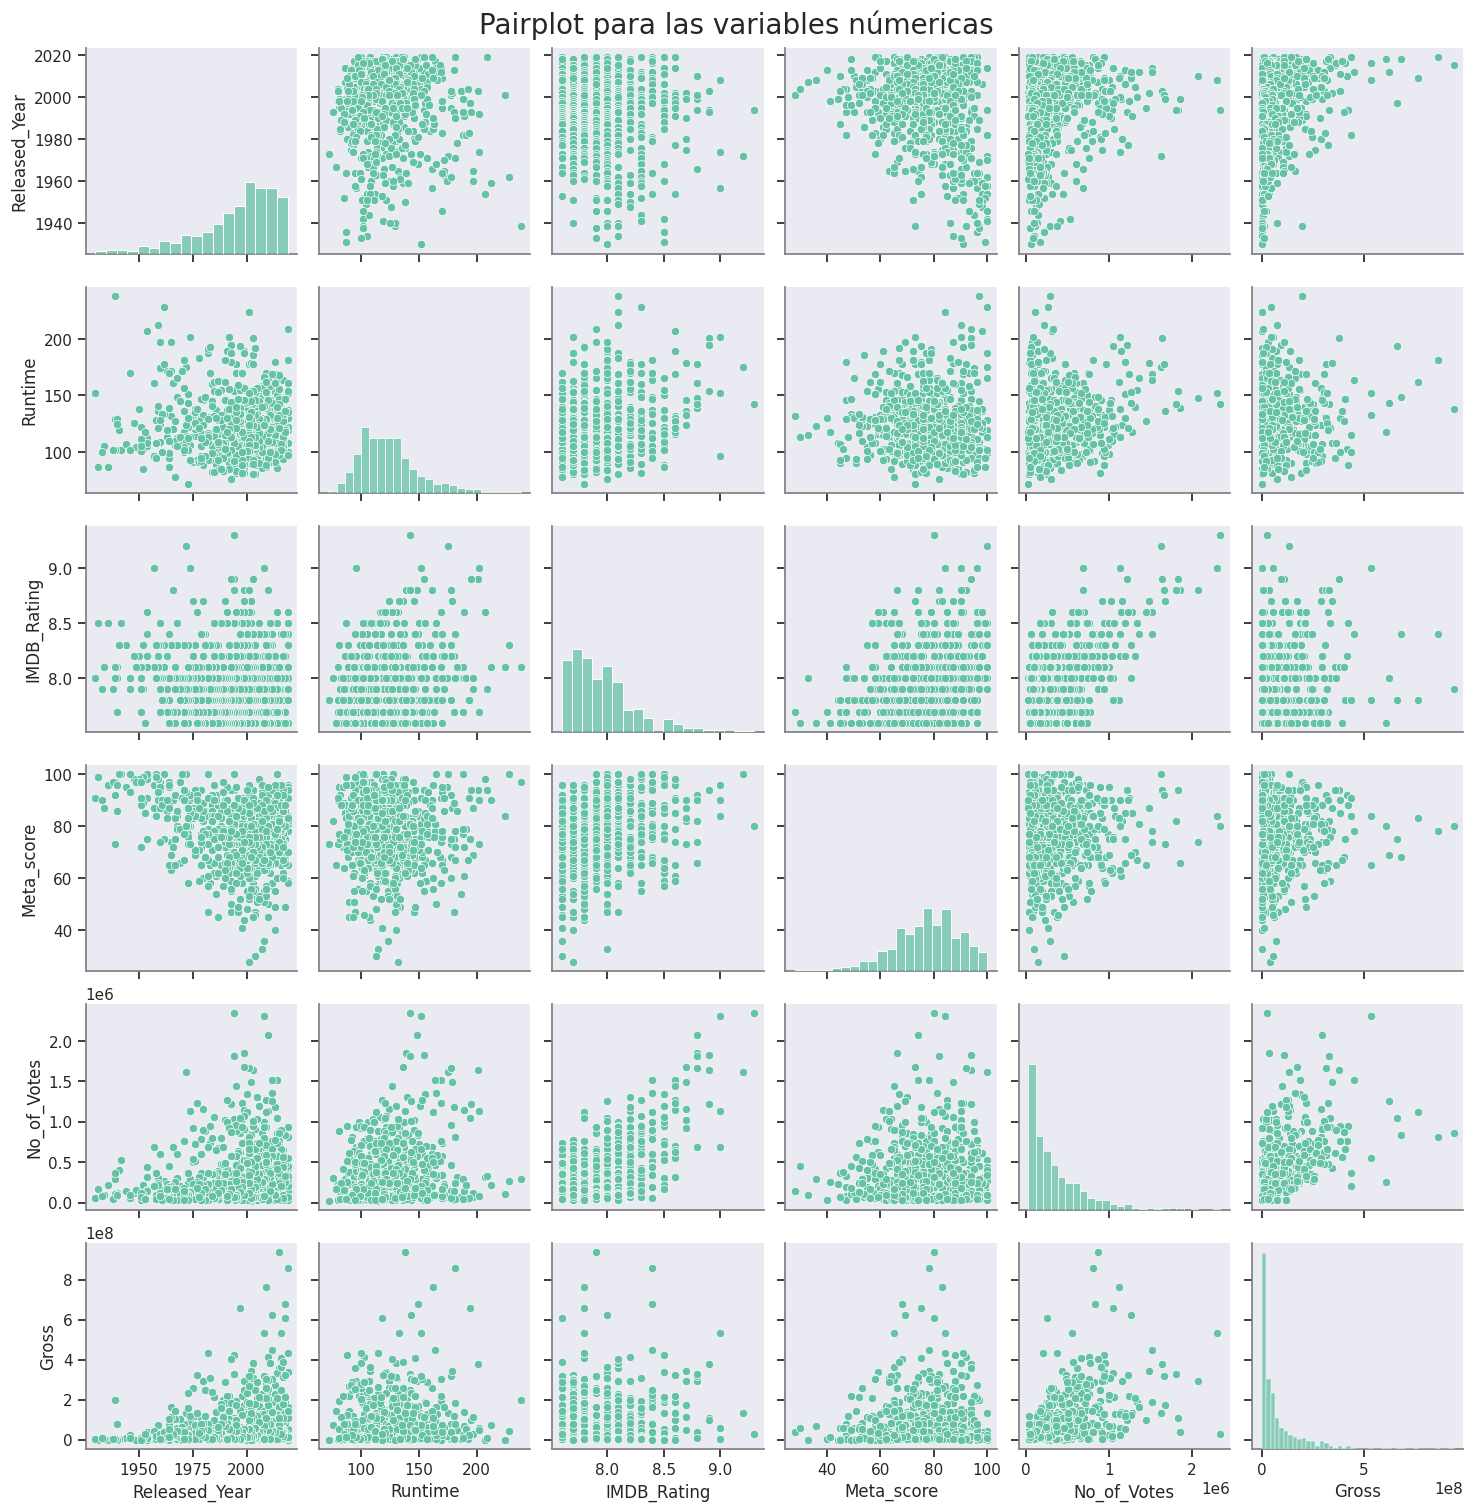

In [15]:
sns.pairplot(df)
plt.suptitle("Pairplot para las variables númericas", y=1.01, fontsize=20)
plt.show()

<Axes: xlabel='Gross', ylabel='No_of_Votes'>

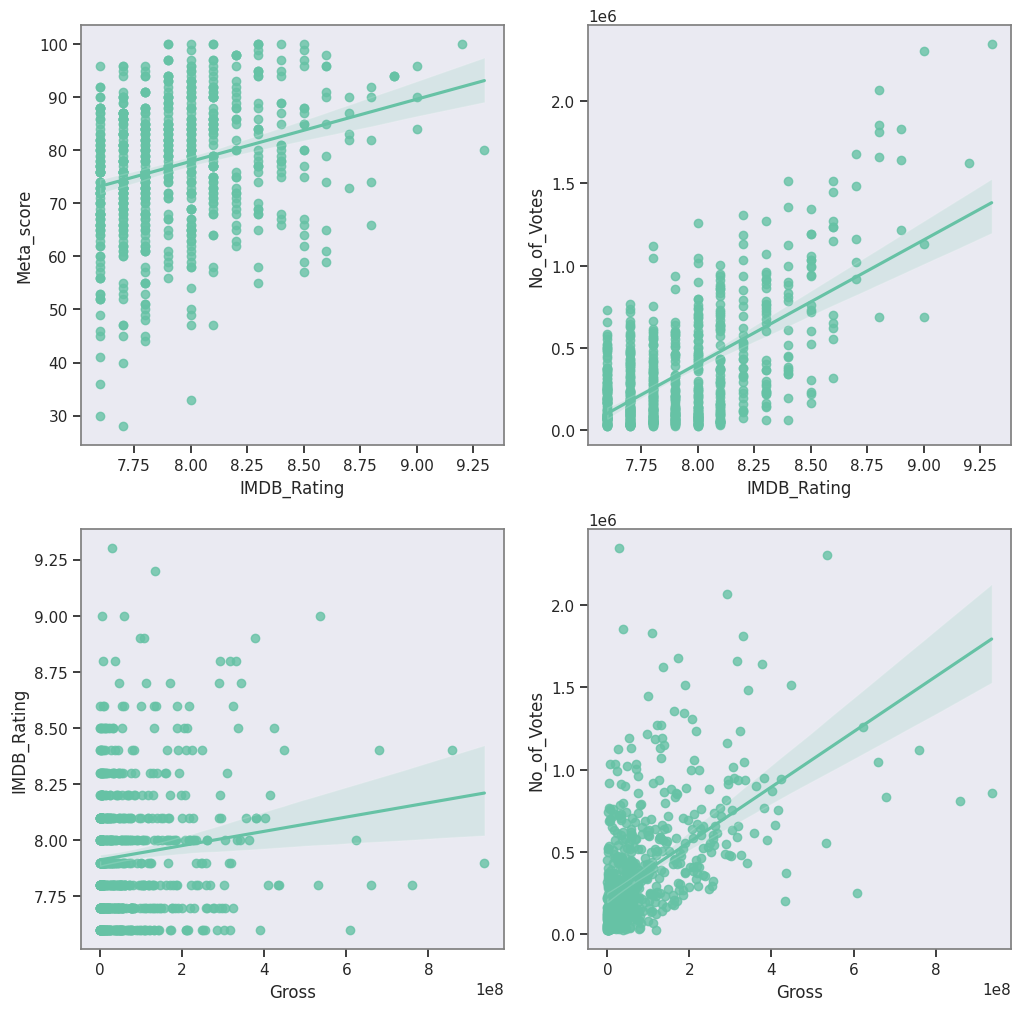

In [16]:
fig,axes = plt.subplots(2,2, figsize=(12,12))
sns.regplot(ax =axes[0,0],data=df, x='IMDB_Rating', y='Meta_score')
sns.regplot(ax =axes[0,1],data=df, x='IMDB_Rating', y='No_of_Votes')
sns.regplot(ax =axes[1,0],data=df, x='Gross', y='IMDB_Rating')
sns.regplot(ax =axes[1,1],data=df, x='Gross', y='No_of_Votes')
